In [13]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [108]:
train = pd.read_csv("../../../card/train.csv",index_col=0)
test = pd.read_csv("../../../card/test.csv",index_col=0)
sub  = pd.read_csv('../../../card/sample_submission.csv')

In [109]:
def TransDayToDate(df):
    target = df.copy()
    target.loc[target.DAYS_EMPLOYED >0,'DAYS_EMPLOYED'] =0
    target['age'] = round(-train.DAYS_BIRTH/ (365.25) +1)
    target['DAYS_EMPLOYED']  =-target['DAYS_EMPLOYED']
    target['begin_month']    = abs(target['begin_month'])
    
    
    return target

In [110]:
train = TransDayToDate(train)
test = TransDayToDate(test)

In [89]:
train.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
age              0
dtype: int64

In [90]:
test.isnull().sum()

gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type           0
family_size          0
begin_month          0
age              10000
dtype: int64

In [91]:
list(train.columns)

['gender',
 'car',
 'reality',
 'child_num',
 'income_total',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'work_phone',
 'phone',
 'email',
 'occyp_type',
 'family_size',
 'begin_month',
 'credit',
 'age']

In [92]:
train.drop_duplicates(train.columns)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
index,,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,0,1,0,0,0,nan,2.0,6.0,1.0,39.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,0,1,0,0,1,Laborers,3.0,5.0,1.0,32.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,0,1,0,1,0,Managers,2.0,22.0,2.0,53.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,0,1,0,1,0,Sales staff,2.0,37.0,0.0,42.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,0,1,0,0,0,Managers,2.0,26.0,2.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,0,1,0,0,0,Core staff,4.0,2.0,1.0,34.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,0,1,0,0,0,nan,2.0,47.0,2.0,43.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,0,1,0,0,0,Core staff,2.0,25.0,2.0,29.0


In [93]:
train.drop_duplicates(train.columns)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
index,,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,0,1,0,0,0,nan,2.0,6.0,1.0,39.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,0,1,0,0,1,Laborers,3.0,5.0,1.0,32.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,0,1,0,1,0,Managers,2.0,22.0,2.0,53.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,0,1,0,1,0,Sales staff,2.0,37.0,0.0,42.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,0,1,0,0,0,Managers,2.0,26.0,2.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,0,1,0,0,0,Core staff,4.0,2.0,1.0,34.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,0,1,0,0,0,nan,2.0,47.0,2.0,43.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,0,1,0,0,0,Core staff,2.0,25.0,2.0,29.0


In [94]:
# train.loc[train.DAYS_EMPLOYED >0,'DAYS_EMPLOYED'] =0
# test.loc[test.DAYS_EMPLOYED >0,'DAYS_EMPLOYED'] =0

In [95]:
train = train.fillna('nan')
test = test.fillna('nan')

In [96]:
NumericCol=train.select_dtypes(include=np.number).columns
StrCol=train.select_dtypes(include=object).columns

In [97]:
for col in StrCol:
    target = train[col]
    lenth = len(target.unique())
                   
    print(col,' : ',lenth)
    print(target.unique())
    
    target_df = train.groupby([col,'credit']).size().reset_index().pivot(index=col,columns='credit',values=0).fillna(0)
    a = target_df.sum(axis=1).to_frame()
    a[1]=a[0]
    a[2]=a[0]
    ratio =target_df/a*100
    ratio.columns = ['0_ratio','1_ratio','2_ratio']
    total = pd.concat([target_df,ratio],axis=1)
    display(total.round(1))
    print()

gender  :  2
['F' 'M']


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
gender,,,,,,
F,2148,4220,11329,12.1,23.8,64.0
M,1074,2047,5639,12.3,23.4,64.4



car  :  2
['N' 'Y']


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
car,,,,,,
N,1982,3990,10438,12.1,24.3,63.6
Y,1240,2277,6530,12.3,22.7,65.0



reality  :  2
['N' 'Y']


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
reality,,,,,,
N,1064,1935,5628,12.3,22.4,65.2
Y,2158,4332,11340,12.1,24.3,63.6



income_type  :  5
['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
income_type,,,,,,
Commercial associate,782.0,1344.0,4076.0,12.6,21.7,65.7
Pensioner,536.0,1084.0,2829.0,12.0,24.4,63.6
State servant,265.0,489.0,1400.0,12.3,22.7,65.0
Student,0.0,3.0,4.0,0.0,42.9,57.1
Working,1639.0,3347.0,8659.0,12.0,24.5,63.5



edu_type  :  5
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
edu_type,,,,,,
Academic degree,2,7,14,8.7,30.4,60.9
Higher education,909,1751,4502,12.7,24.4,62.9
Incomplete higher,114,246,660,11.2,24.1,64.7
Lower secondary,28,59,170,10.9,23.0,66.1
Secondary / secondary special,2169,4204,11622,12.1,23.4,64.6



family_type  :  5
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
family_type,,,,,,
Civil marriage,288,539,1296,13.6,25.4,61.0
Married,2213,4140,11843,12.2,22.8,65.1
Separated,193,349,997,12.5,22.7,64.8
Single / not married,402,940,2154,11.5,26.9,61.6
Widow,126,299,678,11.4,27.1,61.5



house_type  :  6
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
house_type,,,,,,
Co-op apartment,14,30,66,12.7,27.3,60.0
House / apartment,2873,5569,15211,12.1,23.5,64.3
Municipal apartment,110,160,548,13.4,19.6,67.0
Office apartment,24,48,118,12.6,25.3,62.1
Rented apartment,50,147,232,11.7,34.3,54.1
With parents,151,313,793,12.0,24.9,63.1



occyp_type  :  19
['nan' 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers'
 'Waiters/barmen staff']


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
occyp_type,,,,,,
Accountants,118,227,557,13.1,25.2,61.8
Cleaning staff,40,93,270,9.9,23.1,67.0
Cooking staff,58,110,289,12.7,24.1,63.2
Core staff,347,622,1677,13.1,23.5,63.4
Drivers,187,358,1030,11.9,22.7,65.4
HR staff,7,4,51,11.3,6.5,82.3
High skill tech staff,123,270,647,11.8,26.0,62.2
IT staff,8,10,23,19.5,24.4,56.1
Laborers,586,1082,2844,13.0,24.0,63.0


In [98]:
nu =train[NumericCol]

In [99]:
import seaborn as sns

In [100]:
pd.set_option('display.max_rows',100)

child_num  :  19
[ 0  1  2  3  4  5 14 19  7]


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
child_num,,,,,,
0,2233.0,4322.0,11785.0,12.2,23.6,64.3
1,682.0,1313.0,3391.0,12.7,24.4,63.0
2,268.0,535.0,1559.0,11.3,22.7,66.0
3,29.0,79.0,198.0,9.5,25.8,64.7
4,8.0,12.0,27.0,17.0,25.5,57.4
5,2.0,6.0,2.0,20.0,60.0,20.0
7,0.0,0.0,2.0,0.0,0.0,100.0
14,0.0,0.0,3.0,0.0,0.0,100.0
19,0.0,0.0,1.0,0.0,0.0,100.0


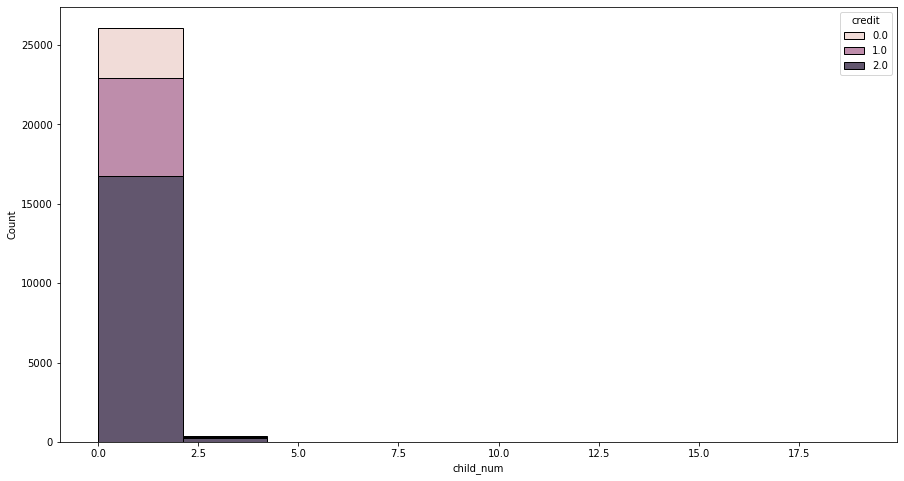


income_total  is unique couts over 70


,income_total
count,2.645700e+04
mean,1.873065e+05
std,1.018784e+05
min,2.700000e+04
25%,1.215000e+05
50%,1.575000e+05
75%,2.250000e+05
max,1.575000e+06


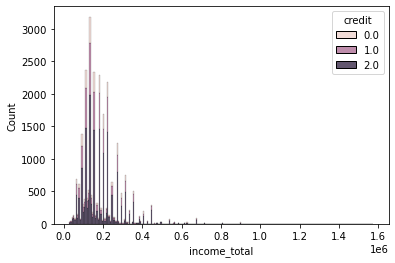


DAYS_BIRTH  is unique couts over 70


,DAYS_BIRTH
count,26457.000000
mean,-15958.053899
std,4201.589022
min,-25152.000000
25%,-19431.000000
50%,-15547.000000
75%,-12446.000000
max,-7705.000000


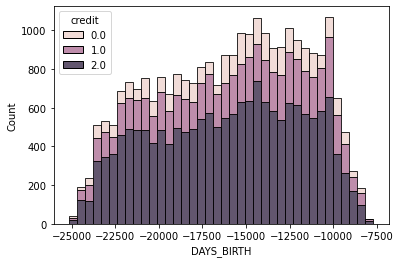


DAYS_EMPLOYED  is unique couts over 70


,DAYS_EMPLOYED
count,26457.000000
mean,2198.529538
std,2370.140530
min,0.000000
25%,407.000000
50%,1539.000000
75%,3153.000000
max,15713.000000


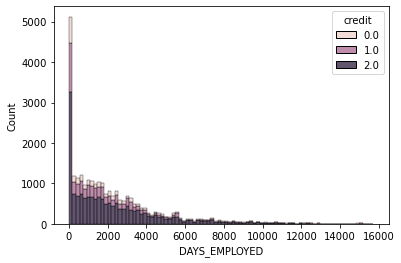


FLAG_MOBIL  :  19
[1]


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
FLAG_MOBIL,,,,,,
1,3222,6267,16968,12.2,23.7,64.1


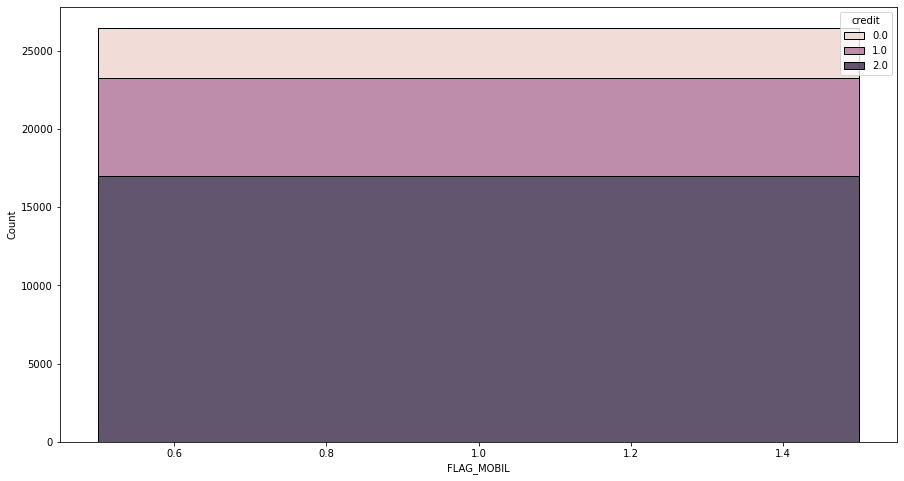


work_phone  :  19
[0 1]


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
work_phone,,,,,,
0,2493,4844,13174,12.2,23.6,64.2
1,729,1423,3794,12.3,23.9,63.8


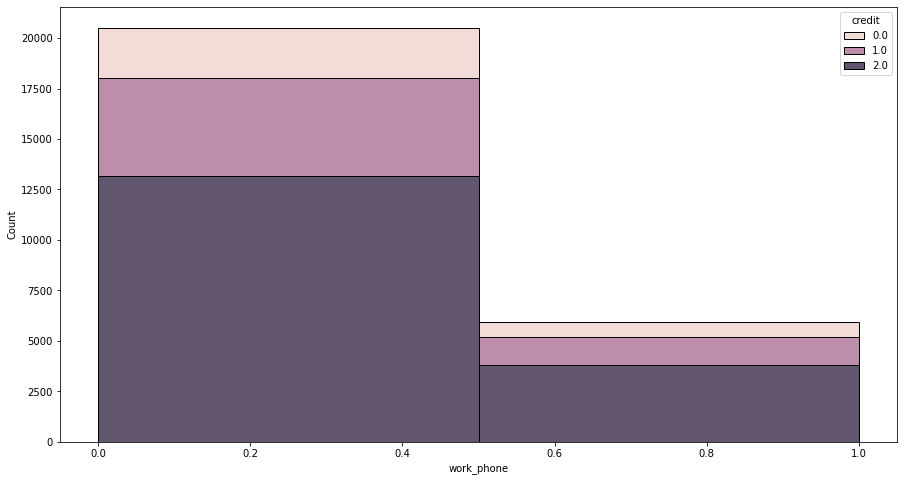


phone  :  19
[0 1]


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
phone,,,,,,
0,2245,4510,11917,12.0,24.2,63.8
1,977,1757,5051,12.5,22.6,64.9


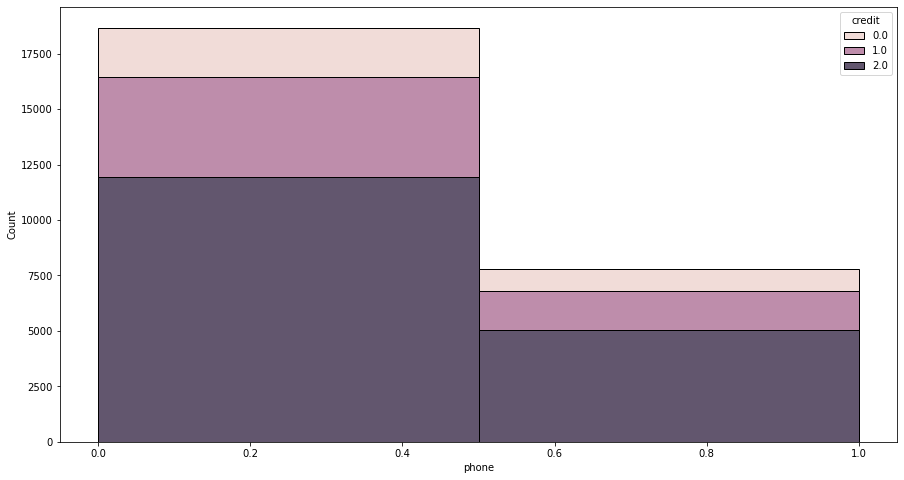


email  :  19
[0 1]


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
email,,,,,,
0,2953,5724,15365,12.3,23.8,63.9
1,269,543,1603,11.1,22.5,66.4


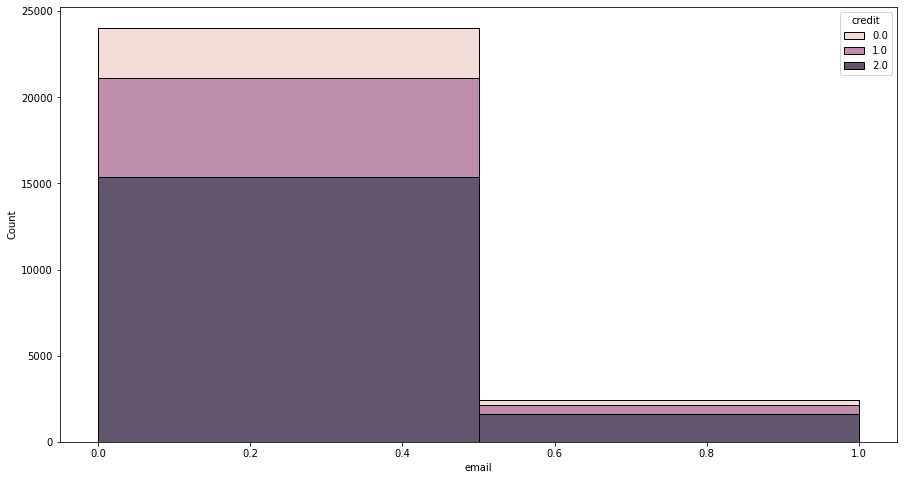


family_size  :  19
[ 2.  3.  4.  1.  5.  6.  7. 15. 20.  9.]


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
family_size,,,,,,
1.0,605.0,1318.0,3186.0,11.8,25.8,62.4
2.0,1720.0,3249.0,9137.0,12.2,23.0,64.8
3.0,610.0,1088.0,2934.0,13.2,23.5,63.3
4.0,251.0,520.0,1489.0,11.1,23.0,65.9
5.0,27.0,74.0,190.0,9.3,25.4,65.3
6.0,7.0,12.0,25.0,15.9,27.3,56.8
7.0,2.0,6.0,1.0,22.2,66.7,11.1
9.0,0.0,0.0,2.0,0.0,0.0,100.0
15.0,0.0,0.0,3.0,0.0,0.0,100.0


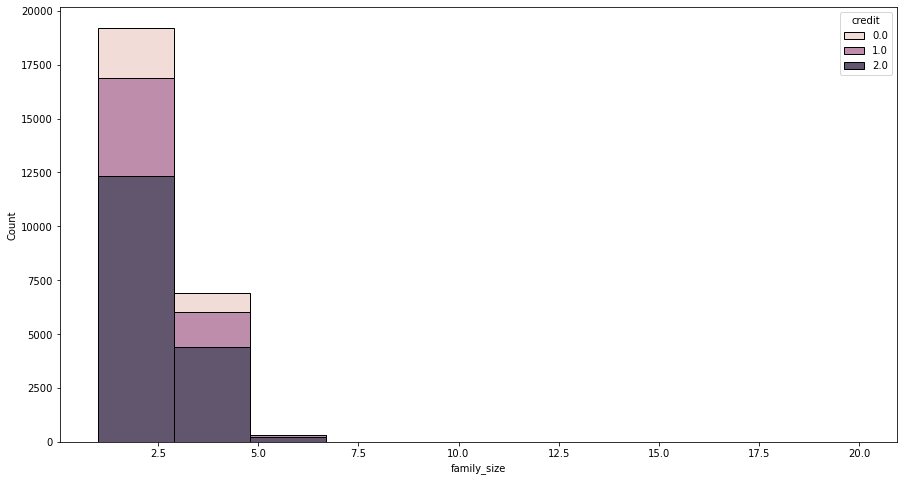


begin_month  :  19
[ 6.  5. 22. 37. 26. 18. 41. 53. 38. 40. 51. 60.  2. 14.  7. 35.  4. 13.
 57. 47. 33. 30. 20.  8. 39. 21. 19. 24. 48. 12. 10. 42. 29.  3. 23. 25.
  1. 15. 32. 59. 54. 34. -0. 27. 45. 56. 46.  9. 44. 36. 43. 49. 11. 55.
 58. 28. 52. 17. 50. 16. 31.]


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
begin_month,,,,,,
-0.0,83.0,148.0,0.0,35.9,64.1,0.0
1.0,96.0,319.0,0.0,23.1,76.9,0.0
2.0,87.0,390.0,1.0,18.2,81.6,0.2
3.0,109.0,470.0,14.0,18.4,79.3,2.4
4.0,75.0,236.0,246.0,13.5,42.4,44.2
5.0,85.0,134.0,362.0,14.6,23.1,62.3
6.0,92.0,131.0,368.0,15.6,22.2,62.3
7.0,77.0,162.0,423.0,11.6,24.5,63.9
8.0,85.0,153.0,374.0,13.9,25.0,61.1


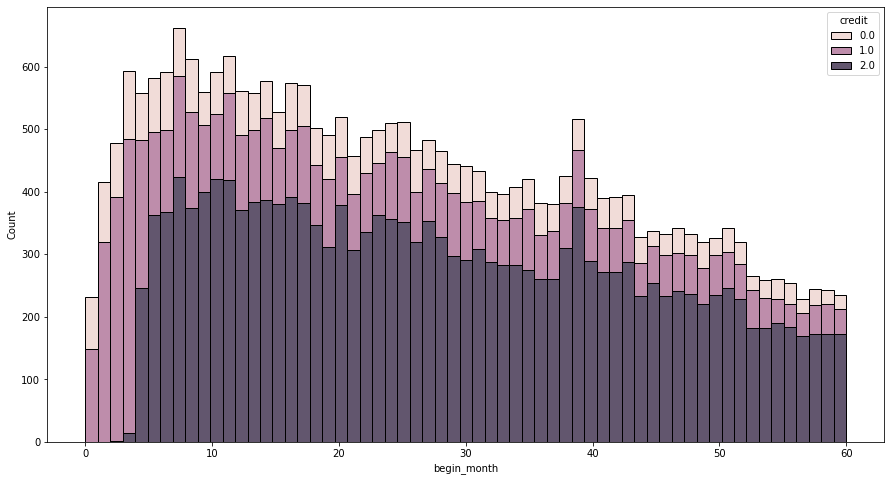


age  :  19
[39. 32. 53. 42. 38. 49. 44. 33. 34. 28. 64. 36. 54. 25. 55. 59. 43. 41.
 62. 50. 48. 37. 56. 47. 60. 52. 51. 66. 67. 45. 65. 26. 29. 35. 57. 27.
 31. 30. 63. 58. 40. 46. 68. 61. 24. 69. 23. 22. 70.]


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
age,,,,,,
22.0,1.0,4.0,1.0,16.7,66.7,16.7
23.0,2.0,11.0,23.0,5.6,30.6,63.9
24.0,22.0,57.0,89.0,13.1,33.9,53.0
25.0,15.0,44.0,114.0,8.7,25.4,65.9
26.0,40.0,105.0,201.0,11.6,30.3,58.1
27.0,55.0,116.0,191.0,15.2,32.0,52.8
28.0,82.0,193.0,356.0,13.0,30.6,56.4
29.0,82.0,215.0,507.0,10.2,26.7,63.1
30.0,62.0,213.0,499.0,8.0,27.5,64.5


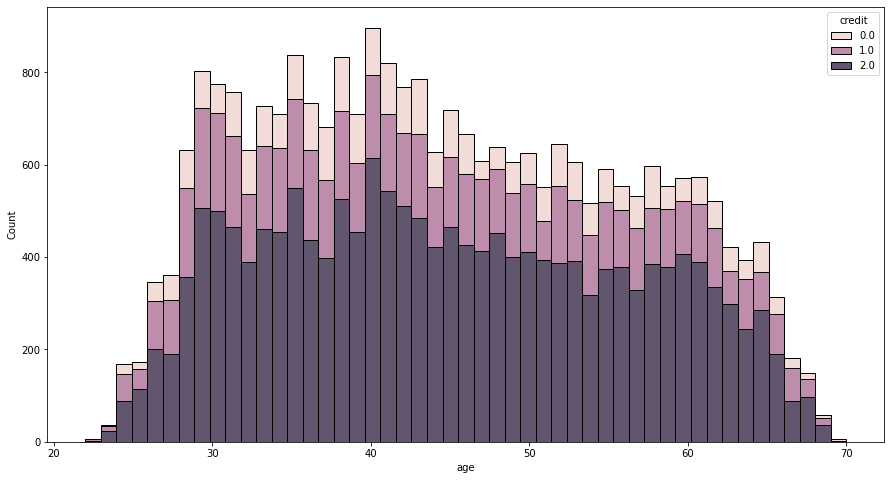

In [43]:
for col in NumericCol:
    if col != 'credit':
        target = train[col]

        Unique = target.unique()
        if len(Unique)<=70:
            print(col,' : ',lenth)
            print(target.unique())
            target_df = train.groupby([col,'credit']).size().reset_index().pivot(index=col,columns='credit',values=0).fillna(0)
            a = target_df.sum(axis=1).to_frame()
            a[1]=a[0]
            a[2]=a[0]
            ratio =target_df/a*100
            ratio.columns = ['0_ratio','1_ratio','2_ratio']
            total = pd.concat([target_df,ratio],axis=1)

            display(total.round(1))
            
            plt_df = train[[col,'credit']]
            
            plt.figure(figsize=(15,8))
            sns.histplot(x=col,hue='credit',data=plt_df,bins=len(plt_df[col].unique()),multiple="stack")
            plt.show()
            print('============================')
            print()
        else:
            print(col,' is unique couts over 70')
            display(target.describe().to_frame())
            plt_df = train[[col,'credit']]
            sns.histplot(x=col,hue='credit',data=plt_df,multiple="stack")
            plt.show()
            plt.show()
            print('============================')
            print()
            
            

In [30]:
target_col = ['DAYS_EMPLOYED','begin_month','income_total']

In [38]:
trainlog = train.copy()

In [39]:
trainlog.income_total = np.log1p(trainlog.income_total)
trainlog.DAYS_EMPLOYED = np.log1p(trainlog.DAYS_EMPLOYED)

In [49]:
train.DAYS_EMPLOYED.describe()

count    26457.000000
mean      2198.529538
std       2370.140530
min          0.000000
25%        407.000000
50%       1539.000000
75%       3153.000000
max      15713.000000
Name: DAYS_EMPLOYED, dtype: float64

<AxesSubplot:xlabel='income_total', ylabel='Count'>

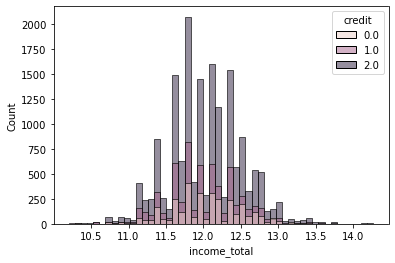

In [112]:
sns.histplot(data=trainlog,x='income_total',bins=50,hue='credit')

In [101]:
def check_box(x):
    target = train[[x,'credit']]
    sns.boxplot(data=target,x='credit',y=x)
    plt.show()
    display(target.groupby('credit').agg(['mean','std','min','max','size']))
    return

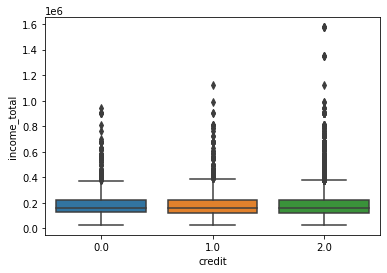

income_total                                          
                 mean            std      min        max   size
credit                                                         
0.0     190807.582402  102139.548208  29250.0   945000.0   3222
1.0     181122.701532   92548.262258  27000.0  1125000.0   6267
2.0     188925.666991  104981.727565  27000.0  1575000.0  16968

In [102]:
check_box('income_total')

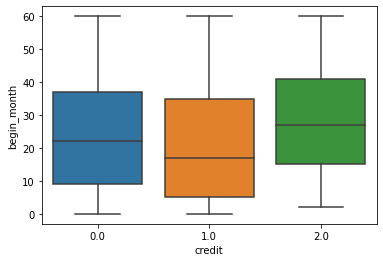

begin_month                             
              mean        std  min   max   size
credit                                         
0.0      23.987896  16.885175  0.0  60.0   3222
1.0      21.078826  17.342548  0.0  60.0   6267
2.0      28.391914  15.715226  2.0  60.0  16968

In [103]:
check_box('begin_month')

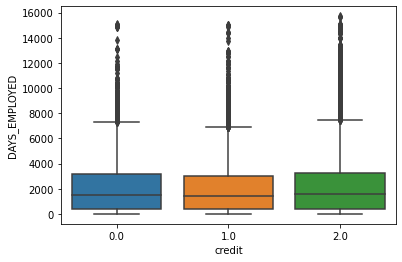

DAYS_EMPLOYED                               
                mean          std min    max   size
credit                                             
0.0      2165.094972  2370.732213   0  15072   3222
1.0      2072.532312  2265.366683   0  15038   6267
2.0      2251.414427  2405.865094   0  15713  16968

In [111]:
check_box('DAYS_EMPLOYED')

DAYS_EMPLOYED  is unique couts over 70


,DAYS_EMPLOYED
count,26457.000000
mean,6.205363
std,2.936199
min,0.000000
25%,6.011267
50%,7.339538
75%,8.056427
max,9.662307


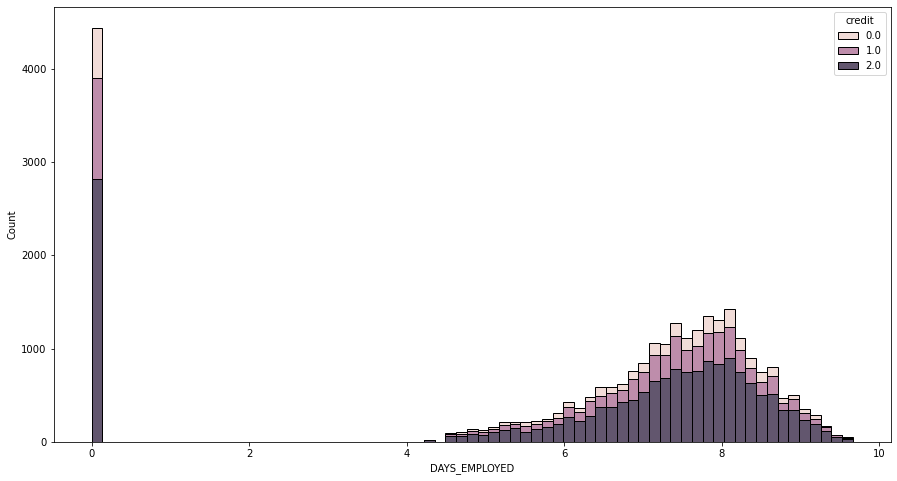


begin_month  :  19
[ 6.  5. 22. 37. 26. 18. 41. 53. 38. 40. 51. 60.  2. 14.  7. 35.  4. 13.
 57. 47. 33. 30. 20.  8. 39. 21. 19. 24. 48. 12. 10. 42. 29.  3. 23. 25.
  1. 15. 32. 59. 54. 34. -0. 27. 45. 56. 46.  9. 44. 36. 43. 49. 11. 55.
 58. 28. 52. 17. 50. 16. 31.]


,0.0,1.0,2.0,0_ratio,1_ratio,2_ratio
begin_month,,,,,,
-0.0,83.0,148.0,0.0,35.9,64.1,0.0
1.0,96.0,319.0,0.0,23.1,76.9,0.0
2.0,87.0,390.0,1.0,18.2,81.6,0.2
3.0,109.0,470.0,14.0,18.4,79.3,2.4
4.0,75.0,236.0,246.0,13.5,42.4,44.2
5.0,85.0,134.0,362.0,14.6,23.1,62.3
6.0,92.0,131.0,368.0,15.6,22.2,62.3
7.0,77.0,162.0,423.0,11.6,24.5,63.9
8.0,85.0,153.0,374.0,13.9,25.0,61.1


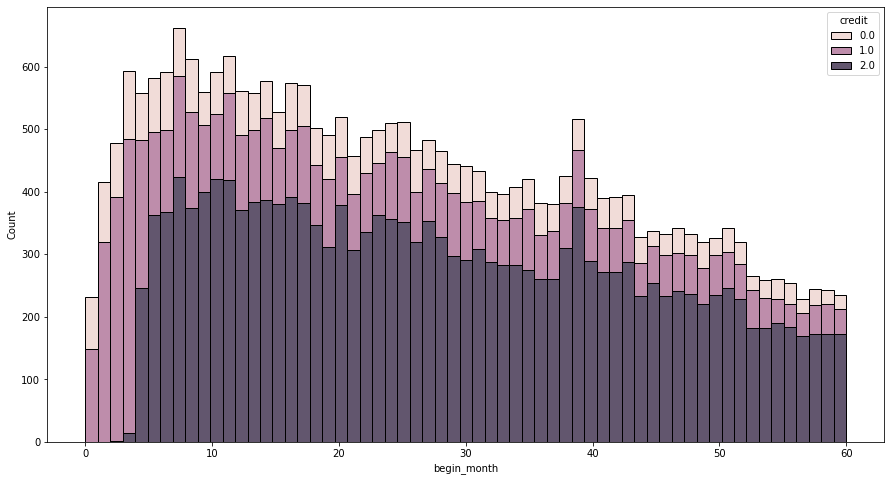


income_total  is unique couts over 70


,income_total
count,26457.000000
mean,12.022074
std,0.480823
min,10.203629
25%,11.707678
50%,11.967187
75%,12.323860
max,14.269766


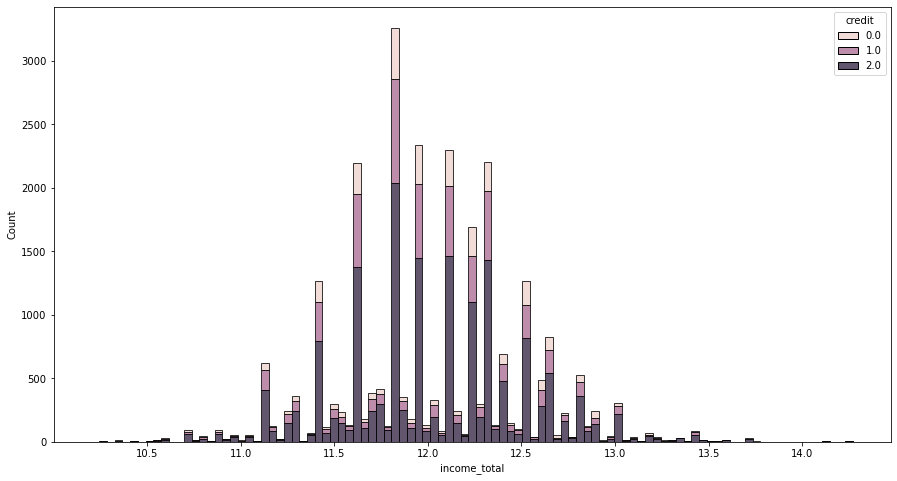

In [42]:
for col in target_col:
    if col != 'credit':
        target = trainlog[col]

        Unique = target.unique()
        if len(Unique)<=70:
            print(col,' : ',lenth)
            print(target.unique())
            target_df = trainlog.groupby([col,'credit']).size().reset_index().pivot(index=col,columns='credit',values=0).fillna(0)
            a = target_df.sum(axis=1).to_frame()
            a[1]=a[0]
            a[2]=a[0]
            ratio =target_df/a*100
            ratio.columns = ['0_ratio','1_ratio','2_ratio']
            total = pd.concat([target_df,ratio],axis=1)

            display(total.round(1))
            
            plt_df = trainlog[[col,'credit']]
            
            plt.figure(figsize=(15,8))
            sns.histplot(x=col,hue='credit',data=plt_df,bins=len(plt_df[col].unique()),multiple="stack")
            plt.show()
            print('============================')
            print()
        else:
            print(col,' is unique couts over 70')
            display(target.describe().to_frame())
            plt_df = trainlog[[col,'credit']]
            plt.figure(figsize=(15,8))
            sns.histplot(x=col,hue='credit',data=plt_df,multiple="stack")
            plt.show()
            plt.show()
            print('============================')
            print()
            
            

<BarContainer object of 48 artists>

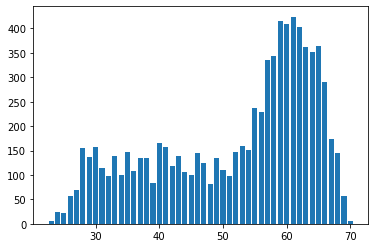

In [346]:
plt.bar(df.index,df.values)

In [169]:
StrCol

Index(['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type',
       'house_type', 'occyp_type'],
      dtype='object')

In [236]:
total

709

In [237]:
vc

,occyp_type_Laborers,occyp_type_Sales staff,occyp_type_nan,occyp_type_Core staff,occyp_type_Managers,occyp_type_High skill tech staff,occyp_type_Accountants,occyp_type_Drivers,occyp_type_Medicine staff,occyp_type_Cooking staff,occyp_type_Private service staff,occyp_type_Security staff,occyp_type_Realty agents,occyp_type_Secretaries,occyp_type_Cleaning staff,occyp_type_IT staff,occyp_type_Low-skill Laborers
39.0,0.246827,0.119887,0.118477,0.110014,0.093089,0.084626,0.050776,0.045134,0.040903,0.03385,0.019746,0.018336,0.008463,0.004231,0.002821,0.00141,0.00141


In [240]:
ageDF = train[list(StrCol)+['age']]

total =[]
for Age in ageDF.age.unique():
    ageLst=[]
    for col in ageDF.columns[:-1]:
        
        vc =ageDF.loc[ageDF.age==Age][col].value_counts().to_frame().T
        totalS = vc.sum().sum()
        vc = vc/totalS
        vc.columns = [vc.index[0] + "_" +x for x in vc.columns]
#         vc['age'] =Age
#         vc = vc.reset_index(drop=True)
        vc =vc.rename(index={vc.index[0]:str(Age)})
        ageLst.append(vc)
        
    ageTotalDf = pd.concat(ageLst,axis=1)
    total.append(ageTotalDf)

In [242]:
ageFi = pd.concat(total).sort_index().reset_index().rename(index={'index':'age'}).fillna(0)

In [254]:
import numpy as np

In [262]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

Text(0, 0.5, 'age')

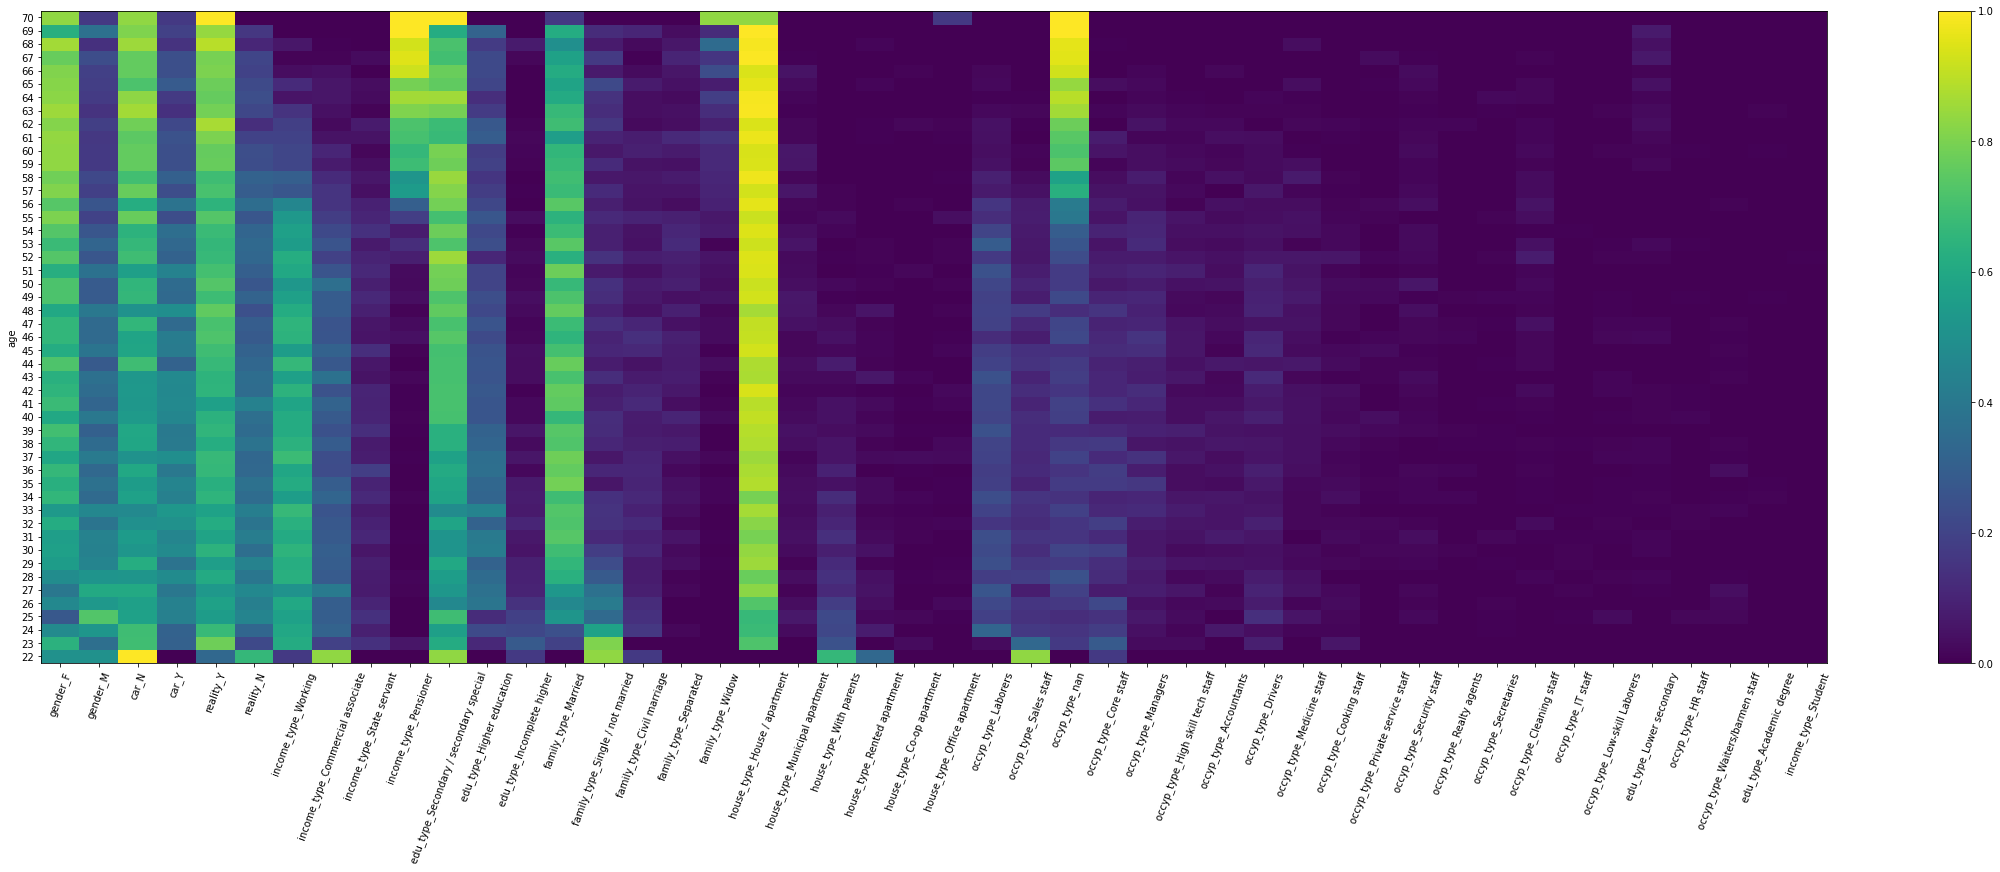

In [323]:
plt.figure(figsize=(40,12))
plt.pcolor(ageFi.iloc[:,1:])
plt.yticks(np.arange(len(ageFi))+0.5,np.array([str(int(float(x))) for x in ageFi['index']]))
plt.xticks(np.arange(len(ageFi.columns)-1)+0.5,ageFi.columns[1:],rotation=70)
plt.colorbar()
plt.ylabel('age')

In [267]:
train['check'] = 0

In [269]:
train.loc[train.age ==63,'check'] =1
train.loc[train.age ==51,'check'] =1

In [270]:
tx = train.drop('age',axis=1)

In [271]:
from sklearn.ensemble import RandomForestClassifier

In [273]:
def TransDayToDate(df):
    target = df.copy()
    target.loc[target.DAYS_EMPLOYED >0,'DAYS_EMPLOYED'] =0
    target['age'] = round(-target.DAYS_BIRTH/ (365.25) +1)
    target['DAYS_EMPLOYED']  =-target['DAYS_EMPLOYED']
    target['begin_month']    =- target['begin_month']
    
    
    return target

txtx =TransDayToDate(tx)


In [274]:
def LabelEn(train):
    trainLa = train.copy()
    
    from sklearn.preprocessing import LabelEncoder
    target_col = train.select_dtypes(include= object).columns
    for col in target_col:
        le = LabelEncoder()
        le.fit(trainLa[col])
        trainLa[col] = le.transform(trainLa[col])

    
    return trainLa 

In [275]:
txla = LabelEn(txtx)

In [291]:
x = txla.drop(['check','age','DAYS_BIRTH'],axis=1)
y = txla['check']

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [293]:
rf = RandomForestClassifier()

In [294]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [295]:
rf.score(X_test,y_test)

0.971907281431091

In [296]:
import matplotlib.pyplot as plt

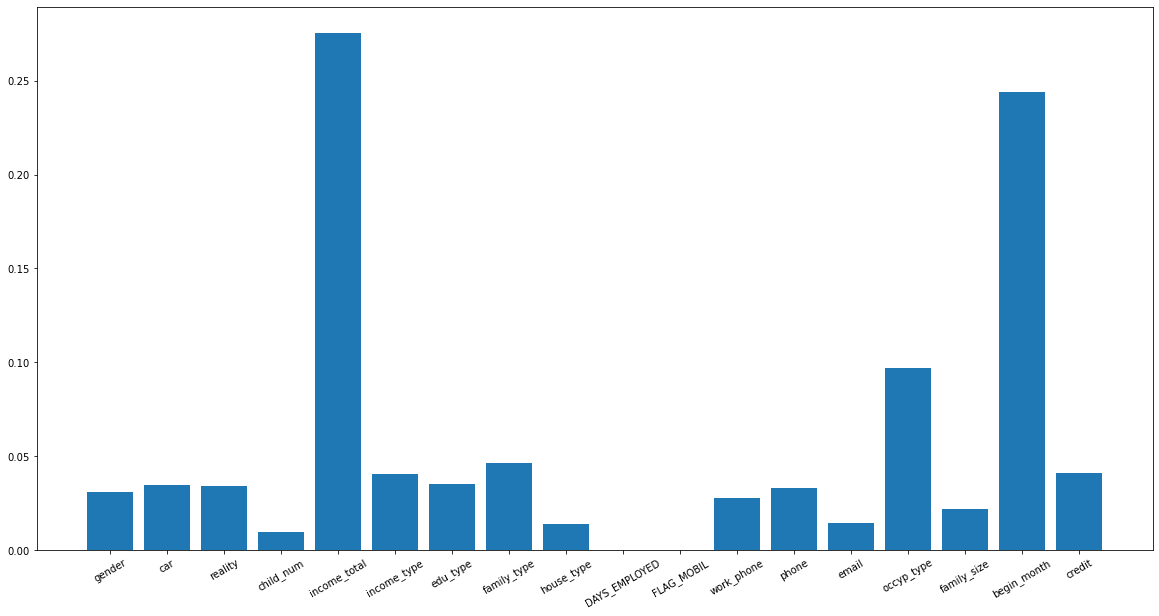

In [297]:
    plt.figure(figsize=(20,10))
    plt.bar(x.columns, rf.feature_importances_)
    plt.xticks(rotation=30)
    plt.show()

In [310]:
tt =pd.DataFrame(ageFi.columns)

In [311]:
tt[tt[0].str.contains('begin')]

,0


gender


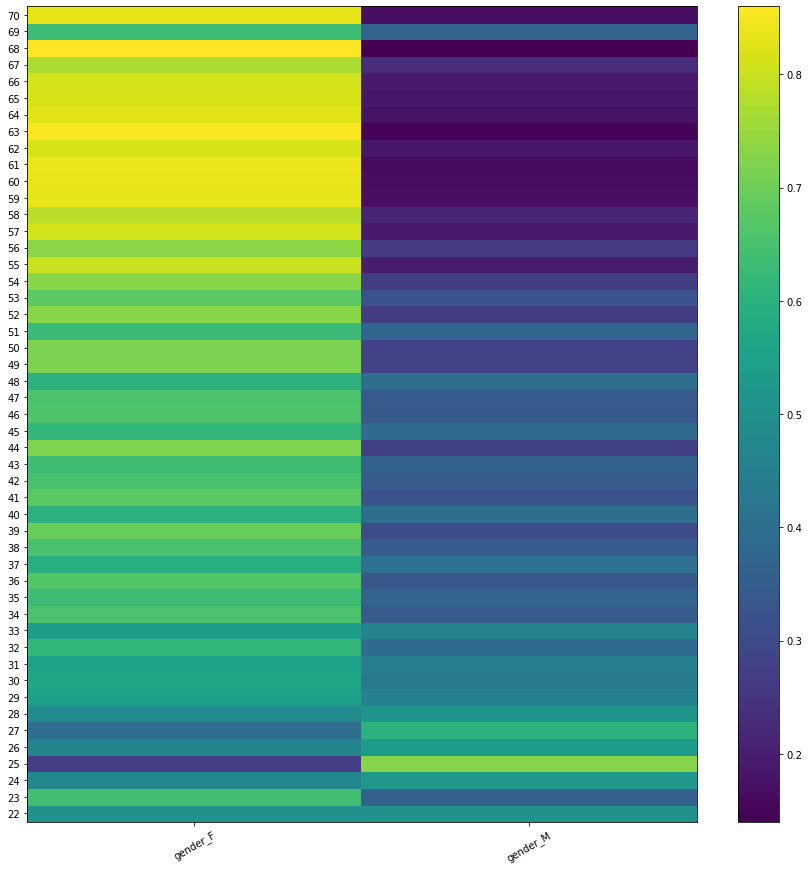

car


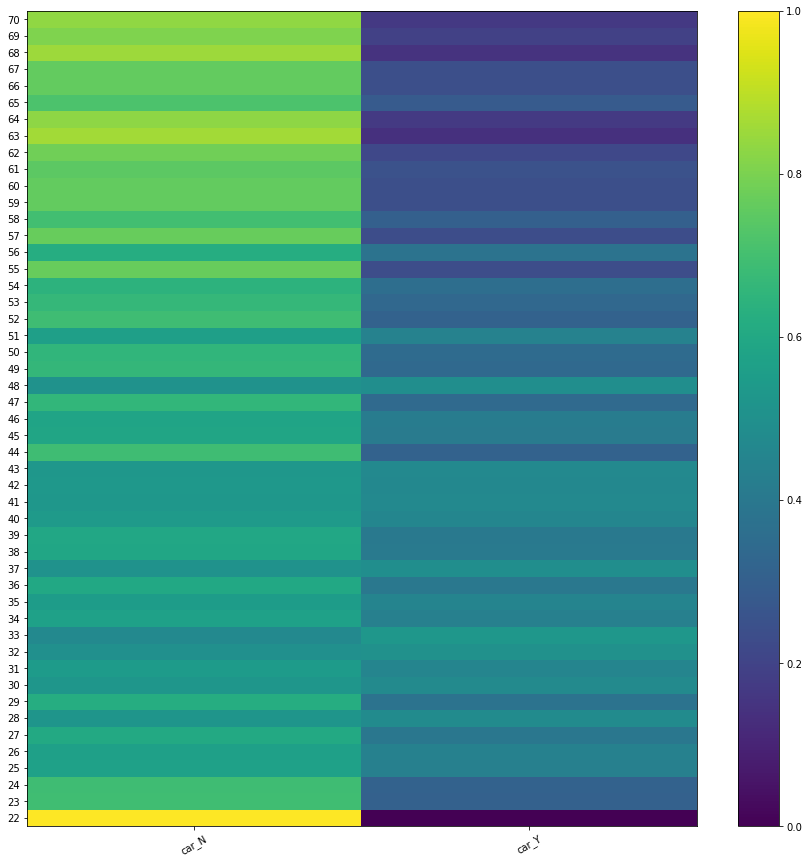

reality


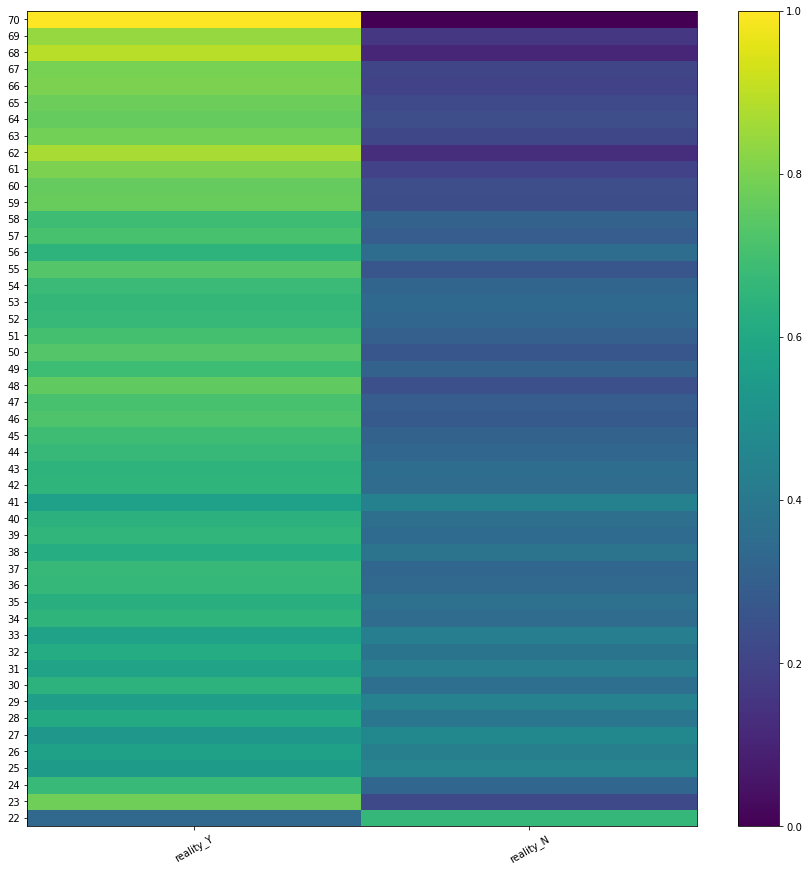

income_type


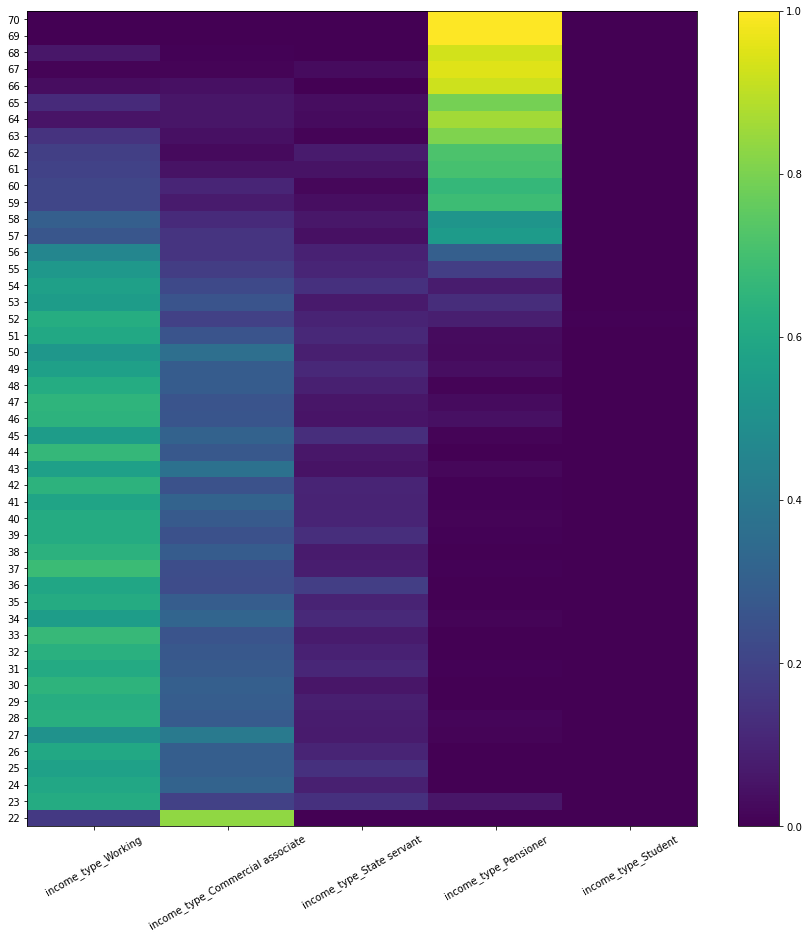

edu_type


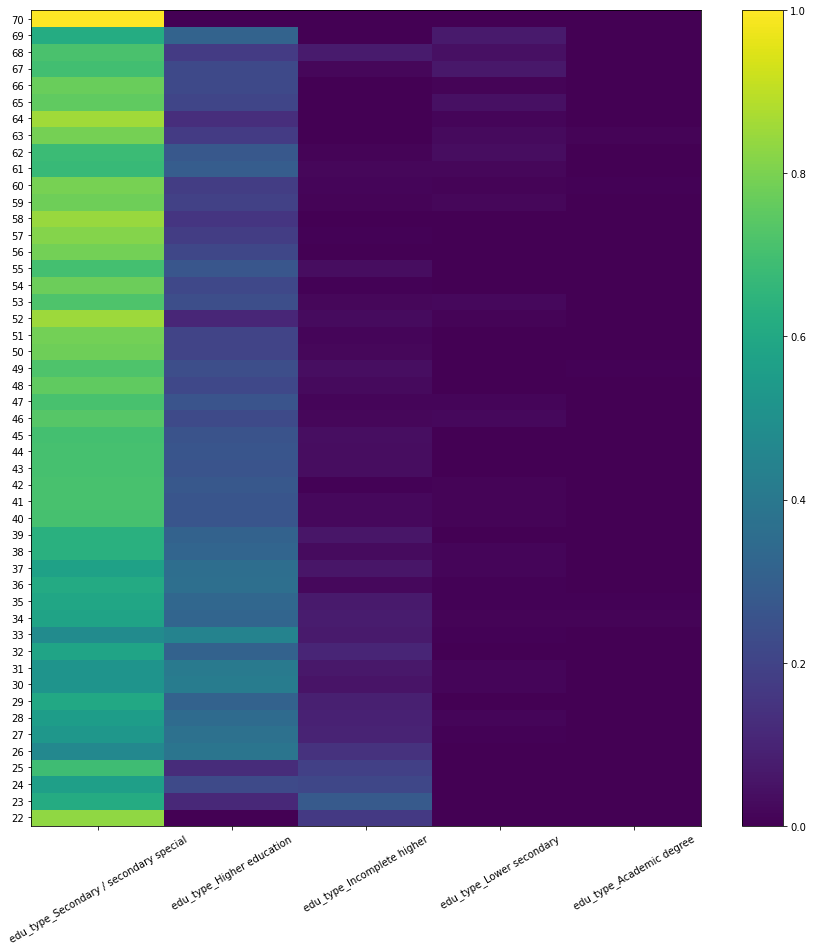

family_type


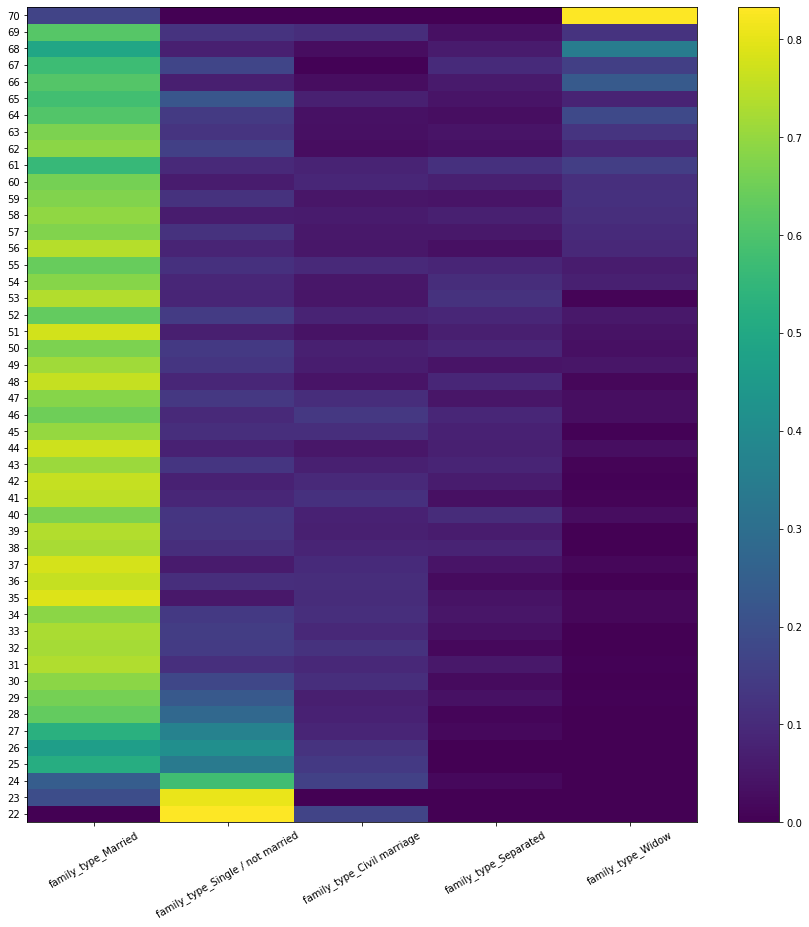

house_type


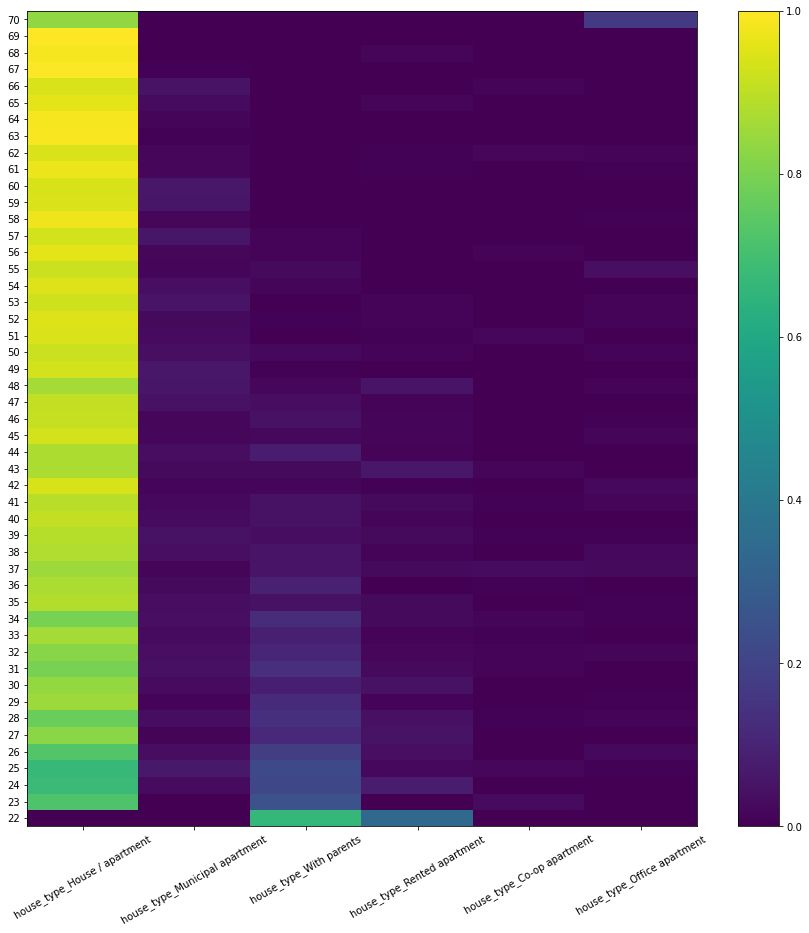

occyp_type


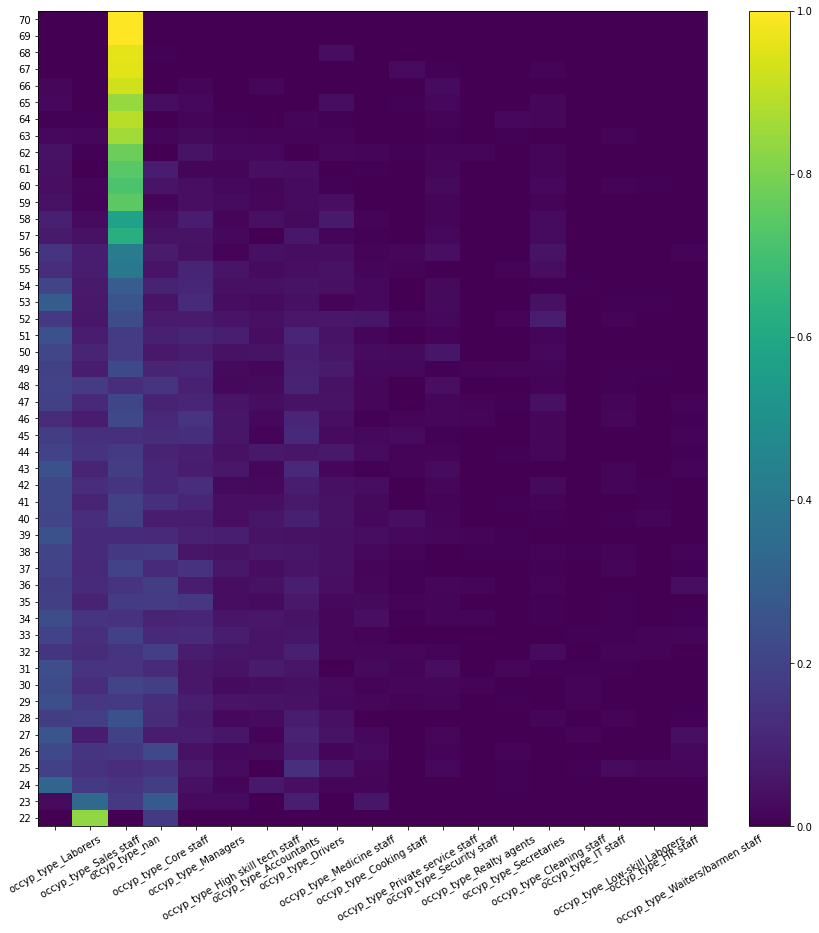

In [348]:
for col in StrCol:
    try:
        print(col)
        targ = ageFi[['index']+list(tt[tt[0].str.contains(col)][0])]

        train['occyp_type'] = train['occyp_type'].fillna('-999')

        plt.figure(figsize=(15,15))
        plt.pcolor(targ.iloc[:,1:])
        plt.yticks(np.arange(len(targ))+0.5,np.array([str(int(float(x))) for x in ageFi['index']]))
        plt.xticks(np.arange(len(targ.columns)-1)+0.5,targ.columns[1:],rotation=30)
        plt.colorbar()    
        plt.show()
    except:
        pass

In [325]:
targ = ageFi[['index']+list(tt[tt[0].str.contains('occy')][0])]

train['occyp_type'] = train['occyp_type'].fillna('-999')

plt.figure(figsize=(15,15))
plt.pcolor(targ.iloc[:,1:])
plt.yticks(np.arange(len(targ))+0.5,np.array([str(int(float(x))) for x in ageFi['index']]))
plt.xticks(np.arange(len(targ.columns)-1)+0.5,targ.columns[1:],rotation=30)
plt.colorbar()

In [171]:
train[list(StrCol)+['age']].groupby(['age','gender','car']).size().reset_index()

,age,gender,car,0
0,22.0,F,N,3
1,22.0,M,N,3
2,23.0,F,N,18
3,23.0,F,Y,5
4,23.0,M,N,7
...,...,...,...,...
187,69.0,F,Y,4
188,69.0,M,N,14
189,69.0,M,Y,7
190,70.0,F,N,5


In [164]:
train.loc[train.age ==63]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
index,,,,,,,,,,,,,,,,,,,,
109,F,N,Y,0,126000.0,Working,Secondary / secondary special,Married,House / apartment,-22811,2234,1,1,1,0,High skill tech staff,2.0,13.0,2.0,63.0
264,F,N,N,0,81000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22791,0,1,0,0,0,nan,2.0,33.0,2.0,63.0
383,F,N,Y,0,99000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22814,0,1,0,1,0,nan,1.0,1.0,1.0,63.0
399,M,N,Y,0,31500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22564,0,1,0,0,0,nan,2.0,7.0,0.0,63.0
499,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22523,0,1,0,1,0,nan,2.0,8.0,0.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25987,F,N,Y,0,337500.0,Working,Higher education,Widow,House / apartment,-22613,2970,1,0,1,0,Accountants,1.0,22.0,2.0,63.0
26034,M,N,Y,2,450000.0,Commercial associate,Higher education,Married,House / apartment,-22582,1391,1,0,1,0,nan,4.0,52.0,2.0,63.0
26084,M,Y,Y,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22731,0,1,0,1,0,nan,2.0,58.0,2.0,63.0


In [149]:
train.loc[train.age ==51]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,age
index,,,,,,,,,,,,,,,,,,,,
47,F,Y,Y,0,292500.0,Commercial associate,Higher education,Married,House / apartment,-18409,3482,1,0,0,0,Sales staff,2.0,48.0,2.0,51.0
118,F,N,Y,0,112500.0,Working,Higher education,Married,House / apartment,-18259,5756,1,0,1,0,Sales staff,2.0,47.0,2.0,51.0
170,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173,678,1,0,1,1,Core staff,3.0,60.0,2.0,51.0
234,M,Y,Y,0,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18318,923,1,0,1,1,Drivers,2.0,59.0,1.0,51.0
351,F,N,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,-18114,10121,1,0,0,0,High skill tech staff,2.0,34.0,2.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26147,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173,678,1,0,1,1,Core staff,3.0,7.0,2.0,51.0
26179,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-18213,1151,1,1,0,0,Managers,2.0,14.0,2.0,51.0
26310,M,Y,Y,0,450000.0,Commercial associate,Higher education,Married,House / apartment,-18362,2141,1,0,0,0,Medicine staff,2.0,22.0,2.0,51.0


In [73]:
sub  = pd.read_csv('../sample_submission.csv')

In [77]:
sub['0'] = 0.12
sub['1'] = 0.24
sub['2'] = 0.64

In [78]:
sub.to_csv("subtest2.csv",index=0)

In [79]:
sub

,index,0,1,2
0,26457,0.12,0.24,0.64
1,26458,0.12,0.24,0.64
2,26459,0.12,0.24,0.64
3,26460,0.12,0.24,0.64
4,26461,0.12,0.24,0.64
...,...,...,...,...
9995,36452,0.12,0.24,0.64
9996,36453,0.12,0.24,0.64
9997,36454,0.12,0.24,0.64
9998,36455,0.12,0.24,0.64


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
def checkUniqueObject(train,test):
    target_col = train.select_dtypes(include= object).columns
    
    check =0
    for col in target_col:
        trainU = train[col].unique()
        testU  = test[col].unique()

        if set(trainU) != set(testU):
            print(col,' have not same Unique values')
            check=1
            
    if check ==0:
        print('all columns have Same Unique values')

checkUniqueObject(train,test)

all columns have Same Unique values


In [70]:
def LabelEn(train,test):
    trainLa = train.copy()
    testLa  = test.copy()
    
    from sklearn.preprocessing import LabelEncoder
    target_col = train.select_dtypes(include= object).columns
    for col in target_col:
        le = LabelEncoder()
        le.fit(trainLa[col])
        trainLa[col] = le.transform(trainLa[col])
        testLa[col] = le.transform(testLa[col])
        
        
    
    return trainLa , testLa

In [71]:
trainLa , testLa = LabelEn(train,test)

In [74]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,,,,,,,,,,,,,,,,,,,
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0


In [75]:
x = trainLa.drop('credit',axis=1)
y = trainLa['credit']

In [76]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [100]:
rf = RandomForestClassifier(random_state=43)

In [101]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=43)

In [102]:
from sklearn.metrics import log_loss

In [103]:
clf_probs = rf.predict_proba(X_test)
score = log_loss(y_test, clf_probs)

score

0.9976223235956478

In [91]:
final_Pred = rf.predict_proba(testLa)

In [98]:
sub  = pd.read_csv('../../../card/sample_submission.csv')
sub[['0','1','2']] =final_Pred
sub.to_csv("submission.csv",index=0)